# Boston 주택가격 예측 하기

### 1. 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드한다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_lables) = boston_housing.load_data()

#데이터셋의 크기를 확인합니다. 
print(len(train_data))
print(len(test_data))


65536/57026 [==================================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data / std

### 2. 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss와 metrics를 mse로 사용합니다.
#모델구성

from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model



### 모델 학습
epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [5]:
print(train_data)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


In [6]:
print(train_labels)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.


In [7]:
model = build_model()
history = model.fit(train_data, train_labels,
                   epochs=130,
                   batch_size=16,
                   validation_split=0.2)

Epoch 1/130
21/21 [==============================] - 2s 23ms/step - loss: 506.7919 - mae: 20.6577 - val_loss: 501.6705 - val_mae: 20.5365
Epoch 2/130
21/21 [==============================] - 0s 3ms/step - loss: 372.8372 - mae: 17.2064 - val_loss: 351.8098 - val_mae: 16.6829
Epoch 3/130
21/21 [==============================] - 0s 3ms/step - loss: 230.3510 - mae: 12.9320 - val_loss: 200.0072 - val_mae: 11.6305
Epoch 4/130
21/21 [==============================] - 0s 3ms/step - loss: 118.7352 - mae: 8.5607 - val_loss: 110.8960 - val_mae: 7.8349
Epoch 5/130
21/21 [==============================] - 0s 3ms/step - loss: 68.9738 - mae: 6.1674 - val_loss: 67.9327 - val_mae: 6.0746
Epoch 6/130
21/21 [==============================] - 0s 3ms/step - loss: 47.2524 - mae: 4.9548 - val_loss: 50.2337 - val_mae: 5.1710
Epoch 7/130
21/21 [==============================] - 0s 3ms/step - loss: 35.9320 - mae: 4.1656 - val_loss: 37.9759 - val_mae: 4.5903
Epoch 8/130
21/21 [==============================] - 0

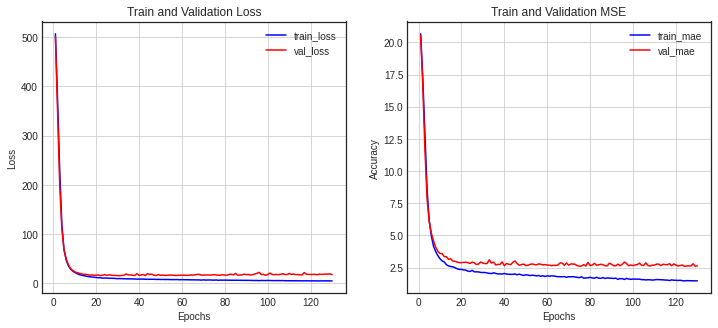

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
test_mse_score, test_mae_score = model.evaluate(test_data,test_lables)

4/4 [==============================] - 1s 2ms/step - loss: 19.7880 - mae: 2.7814


# 회고
- 테스트진행해보니, epochs는 높을수록, 배치사이즈는 작을수록 좋은 점수가 나온다. 물론 다 그렇지는 않았다.
- 그래프가 어떻게 나와야 잘나오는 건지 모르겠다. ㅜㅜ 해석방법이 어렵다. 
- 벨리데이션의 개념에 대해 아직 숙지가 되어있지 않았는데 이번기회 조금 된것 같다.